In [306]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prerequisite Requirements

This ipynb file requires the following modules:
- `pip install seaborn` 
- `pip install numpy`
- `pip install matplotlib`
- `pip install plotly_express`


You can check your current version via the following terminal commands: 
- `matplotlib.__version__`,
- `import seaborn as sns
- sns.__version__`.
- `import numpy
- numpy.version.version`,

In [307]:
year = 2019
url2019 = f'https://api.census.gov/data/{year}/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'
url2020 = f'https://api.census.gov/data/{year + 1}/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'

## Questions to Answer

1. Question 1 - Visual Type A : Time in business vs Wealth
2. Question 2 - Visual Type A : Size of business vs Wealth
3. Question 3 - Visual Type B : Employee Size vs Wealth

4. Question 4 - Visual Type A : Demographic of Employees
5. Question 5 - Visual Type A : Demographic of Employees
6. Question 6 - Visual Type B : Demographic of Employees

7. Question 7 - Visual Type A : Wealth by Business Type
8. Question 8 - Visual Type A : Wealth by Location
9. Question 9 - Visual Type B : Mystery Question


In [308]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as pl
import seaborn as sns
import plotly.graph_objects as go

YearinBusinessDF = pd.read_csv('csv\ABSCS2018.AB1800CSA02-2023-04-20T164944.csv')
ReceiptSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA03-2023-04-20T164951.csv')
EmploymentSizeOfFirmDF = pd.read_csv('csv\ABSCS2018.AB1800CSA04-2023-04-20T164954.csv')

In [309]:
response2019 = requests.get(url2019)
response2020 = requests.get(url2020)

In [310]:
data2019 = response2019.json()
data2020 = response2020.json()

col2019 = data2019[0]
col2020 = data2020[0]

df2019 = pd.DataFrame(data2019[1:], columns=col2019)
df2020 = pd.DataFrame(data2020[1:], columns=col2020)

colToDrop = ['GEO_ID', 'NAME', f'NAICS2017', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'PAYANN_F',
 'FIRMPDEMP_S', 'FIRMPDEMP_S_F', 'RCPPDEMP_S', 'RCPPDEMP_S_F', 'EMP_S', 'EMP_S_F', 'PAYANN_S',
 'PAYANN_S_F', 'us', 'YEAR', 'FIRMPDEMP_F', 'RCPPDEMP_F', 'EMP_F', 'VET_GROUP', 'EMPSZFI']

colsToRename2019 = {'FIRMPDEMP': 'FIRMPDEMP2019', 'RCPPDEMP': 'RCPPDEMP2019', 'EMP': 'EMP2019', 'PAYANN': 'PAYANN2019'}
colsToRename2020 = {'FIRMPDEMP': 'FIRMPDEMP2020', 'RCPPDEMP': 'RCPPDEMP2020', 'EMP': 'EMP2020', 'PAYANN': 'PAYANN2020'}

df2019 = df2019.rename(colsToRename2019, axis=1)
df2020 = df2020.rename(colsToRename2020, axis=1)

df2019 = df2019.drop(columns= colToDrop, axis = 1).convert_dtypes().drop_duplicates()
df2020 = df2020.drop(columns= colToDrop, axis = 1).convert_dtypes().drop_duplicates()

mergedYearTables = pd.merge(left = df2019, 
                            right = df2020,
                            how = 'outer')

mergedYearTables.head()

,NAICS2017_LABEL,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI_LABEL,FIRMPDEMP2019,RCPPDEMP2019,EMP2019,PAYANN2019,FIRMPDEMP2020,RCPPDEMP2020,EMP2020,PAYANN2020
0,Total for all sectors,Equally male/female,Total,Total,Total,All firms,846433,1409475815,7882151,293311176,808356,1388974112,7739218,287219119
1,Total for all sectors,Equally male/female,Total,Total,Total,Firms with no employees,113112,44015421,0,8164129,108327,42734976,0,6048166
2,Total for all sectors,Equally male/female,Total,Total,Total,Firms with 1 to 4 employees,414362,179974224,852850,30529173,391278,167173475,808987,29227558
3,Total for all sectors,Equally male/female,Total,Total,Total,Firms with 5 to 9 employees,147765,158247515,977118,33896032,137950,148392811,913490,32735600
4,Total for all sectors,Equally male/female,Total,Total,Total,Firms with 10 to 19 employees,92532,175403006,1242201,41956375,94549,197280325,1277565,43971359


## Cleaning

In [311]:
ALLcolsTodrop = ['Year (YEAR)',
                 '2017 NAICS code (NAICS2017)',
                 'Relative standard error of employer firms (%) (FIRMPDEMP_S)',
                 'Relative standard error of sales, value of shipments, or revenue of employer firms (%) (RCPPDEMP_S)',
                 'Relative standard error of number of employees (%) (EMP_S)',
                 'Relative standard error of annual payroll (%) (PAYANN_S)']
                   


YearinBusinessDF.drop(ALLcolsTodrop,inplace=True,axis=1)
ReceiptSizeOfFirmDF.drop(ALLcolsTodrop,inplace=True,axis=1)
EmploymentSizeOfFirmDF.drop(ALLcolsTodrop,inplace=True,axis=1)

mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)

mergedTables.fillna(0)

,Geographic Area Name (NAME),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Sex code (SEX_LABEL),Meaning of Ethnicity code (ETH_GROUP_LABEL),Meaning of Race code (RACE_GROUP_LABEL),Meaning of Veteran code (VET_GROUP_LABEL),Meaning of Years in business code (YIBSZFI_LABEL),Number of employer firms (FIRMPDEMP),"Sales, value of shipments, or revenue of employer firms ($1,000) (RCPPDEMP)",Number of employees (EMP),"Annual payroll ($1,000) (PAYANN)","Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)"
0,United States,Total for all sectors,Total,Total,Total,Total,Firms with less than 2 years in business,"826,575","680,812,490","3,554,392","142,887,616",0
1,United States,Total for all sectors,Total,Total,Total,Total,Firms with 2 to 3 years in business,"718,376","769,496,008","5,116,799","173,356,299",0
2,United States,Total for all sectors,Total,Total,Total,Total,Firms with 4 to 5 years in business,"542,963","724,662,955","4,602,804","176,253,624",0
3,United States,Total for all sectors,Total,Total,Total,Total,Firms with 6 to 10 years in business,"948,138","1,735,022,260","9,572,368","416,994,321",0
4,United States,Total for all sectors,Total,Total,Total,Total,Firms with 11 to 15 years in business,"812,155","1,968,981,291","9,098,324","445,296,811",0
...,...,...,...,...,...,...,...,...,...,...,...,...
16481,United States,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,0,S,S,0 to 19 employees,S,"Firms with sales/receipts of $50,000 to $99,999"
16482,United States,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,0,S,S,0 to 19 employees,S,"Firms with sales/receipts of $100,000 to $249,999"
16483,United States,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,0,D,D,0 to 19 employees,D,"Firms with sales/receipts of $250,000 to $499,999"
16484,United States,Industries not classified,Unclassifiable,Unclassifiable,Unclassifiable,Unclassifiable,0,D,D,20 to 99 employees,D,"Firms with sales/receipts of $500,000 to $999,999"


## Visualizations


c:\Users\nrovr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



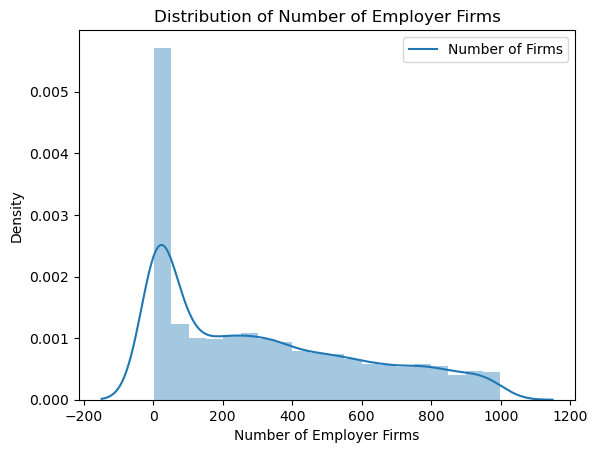

In [312]:
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

sns.distplot(mergedTables['Number of employer firms (FIRMPDEMP)'].dropna())

plt.title('Distribution of Number of Employer Firms')
plt.xlabel('Number of Employer Firms')
plt.ylabel('Density')

plt.legend(['Number of Firms'])

plt.show()

In [313]:
mergedTables['Annual payroll ($1,000) (PAYANN)'] = pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')

fig = px.treemap(mergedTables, path=['Meaning of NAICS code (NAICS2017_LABEL)'], values='Annual payroll ($1,000) (PAYANN)')

fig.update_layout(title='Wealth by Industry')
fig.show()

#Add values to boxes

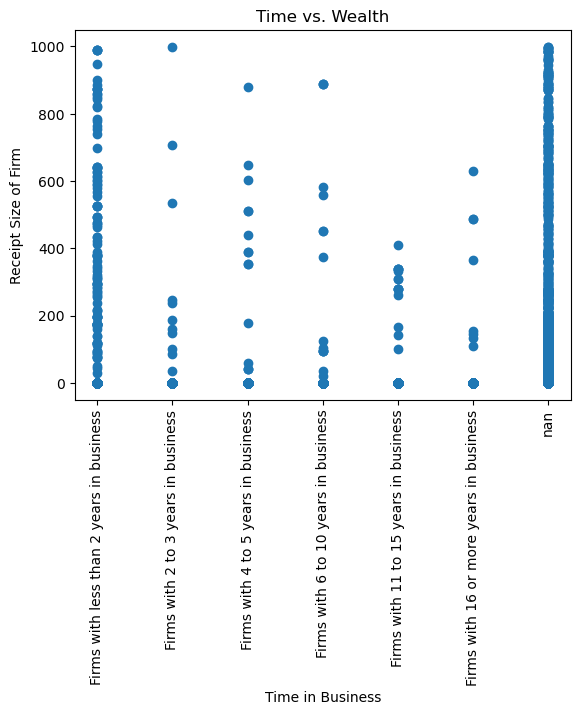

In [314]:
mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'] = mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].astype(str)

data = mergedTables[['Meaning of Years in business code (YIBSZFI_LABEL)', 'Annual payroll ($1,000) (PAYANN)']].fillna((0))

plt.scatter(data['Meaning of Years in business code (YIBSZFI_LABEL)'], data['Annual payroll ($1,000) (PAYANN)'])
plt.xlabel('Time in Business')
plt.ylabel('Receipt Size of Firm')
plt.title('Time vs. Wealth')
plt.xticks(rotation=90)

plt.show()

#Remove NaN

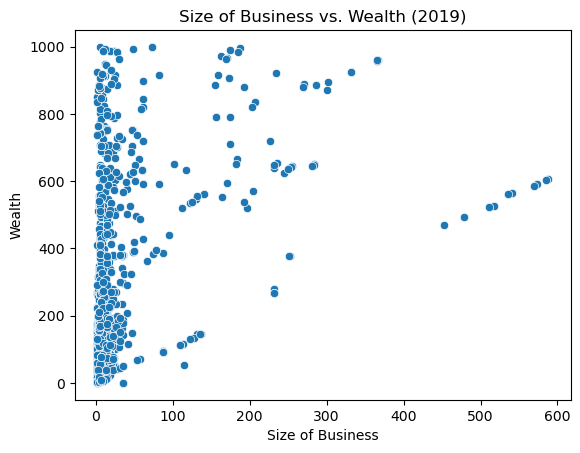

In [315]:
mergedTables['Annual payroll ($1,000) (PAYANN)'] = pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')

sns.scatterplot(x=mergedTables['Number of employer firms (FIRMPDEMP)'], y=mergedTables['Annual payroll ($1,000) (PAYANN)'])

plt.xlabel('Size of Business')
plt.ylabel('Wealth')
plt.title('Size of Business vs. Wealth (2019)')

plt.show()

In [316]:
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)

mergedTables[['Meaning of Race code (RACE_GROUP_LABEL)']].drop_duplicates()
mergedTables = mergedTables.loc[mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'] != 'Total']

renamedRaceDict = {
    'American Indian and Alaska Native': 'Native American ', 
    'Native Hawaiian and Other Pacific Islander': 'Islander', 
    'Equally minority/nonminority': 'Minority',
    'Black or African American': 'African American',
    'Total': 'Unclassifiable'
}

renamedYearsDict = {
    'Firms with less than 2 years in business': '0 to 2', 
    'Firms with 2 to 3 years in business': '2-3', 
    'Firms with 4 to 5 years in business': '4-5',
    'Firms with 6 to 10 years in business' : '6-10',
    'Firms with 11 to 15 years in business' : '11-15',
    'Firms with 16 or more years in business' : '16 plus'
}

mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'] = mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].replace(renamedYearsDict)

mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'] = mergedTables['Meaning of Race code (RACE_GROUP_LABEL)'].replace(renamedRaceDict)

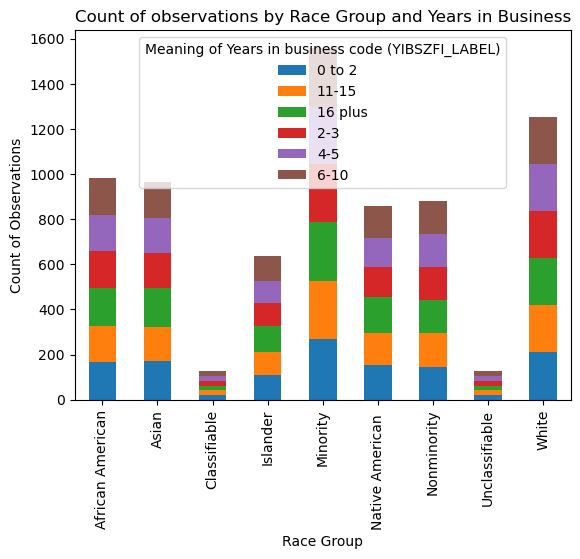

In [317]:
grouped_df = mergedTables.groupby(['Meaning of Race code (RACE_GROUP_LABEL)', 'Meaning of Years in business code (YIBSZFI_LABEL)']).size().reset_index(name='COUNT')

df = grouped_df.pivot(index='Meaning of Race code (RACE_GROUP_LABEL)', columns='Meaning of Years in business code (YIBSZFI_LABEL)', values='COUNT')

df.plot(kind='bar', stacked=True)

plt.title('Count of observations by Race Group and Years in Business')

plt.xlabel('Race Group')
plt.ylabel('Count of Observations')

plt.show()

In [318]:
import plotly.express as px
grouped_df = mergedTables[mergedTables['Meaning of Sex code (SEX_LABEL)'] != 'Total']['Meaning of Sex code (SEX_LABEL)'].value_counts().reset_index(name='Count')
grouped_df.rename(columns={'index': 'Sex'}, inplace=True)

fig = px.treemap(grouped_df, path=['Sex'], values='Count')
fig.update_layout(title='Distribution of Sex in the Survey')

fig.show()

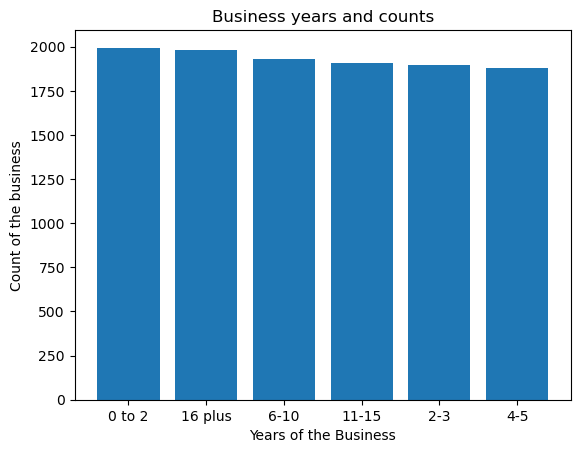

In [319]:
# Plot the data using the filtered DataFrame
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)

mergedTables= mergedTables.loc[:, ['Meaning of Years in business code (YIBSZFI_LABEL)']]
mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'] = mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].replace({
    'Firms with less than 2 years in business': '0 to 2', 
    'Firms with 2 to 3 years in business': '2-3', 
    'Firms with 4 to 5 years in business': '4-5',
    'Firms with 6 to 10 years in business' : '6-10',
    'Firms with 11 to 15 years in business' : '11-15',
    'Firms with 16 or more years in business' : '16 plus',
})

##

plt.bar(mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].value_counts().index, mergedTables['Meaning of Years in business code (YIBSZFI_LABEL)'].value_counts().values)

plt.xlabel('Years of the Business')
plt.ylabel('Count of the business')
plt.title('Business years and counts')
plt.show()

In [320]:
mergedTables = pd.concat([YearinBusinessDF, ReceiptSizeOfFirmDF], axis=0, ignore_index=False)

# Convert the 'Annual payroll' and 'Number of employer firms' columns to numeric values
mergedTables['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)']= pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

# Sort the data in ascending order by the 'Annual payroll' column
mergedTables_sorted = mergedTables.sort_values('Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)')

fig = go.Figure()

fig.add_trace(go.Box(
    y=mergedTables_sorted['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'],
    name='Business Wealth',
    text=['Business Wealth'],
    marker_color='darkblue',
    boxmean=True # represent mean
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employer firms (FIRMPDEMP)'],
    name='Number of Employer Firms',
    text=['Number of Employer Firms'],
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))
fig.update_layout(
    title="Business wealth and Number of Employer Firms",
    xaxis=dict(title="Variables"),
    yaxis=dict(title="Values")
)

fig.show()

In [321]:
# Convert the 'Annual payroll' and 'Number of employer firms' columns to numeric values
mergedTables['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'] = pd.to_numeric(mergedTables['Annual payroll ($1,000) (PAYANN)'], errors='coerce')
mergedTables['Number of employer firms (FIRMPDEMP)'] = pd.to_numeric(mergedTables['Number of employer firms (FIRMPDEMP)'], errors='coerce')

# Sort the data in ascending order by the 'Annual payroll' column
mergedTables_sorted = mergedTables.sort_values('Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)')

fig = go.Figure()

fig.add_trace(go.Box(
    y=mergedTables_sorted['Meaning of Sales, value of shipments, or revenue size of firms code (RCPSZFI_LABEL)'],
    name='Business Wealth',
    text=['Business Wealth'],
    hovertemplate='Business wealth: %{y:$.2f}<extra></extra>',
    marker_color='darkblue',
    boxmean=True # represent mean
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employer firms (FIRMPDEMP)'],
    name='Number of Employer Firms',
    text=['Number of Employer Firms'],
    hovertemplate='Number of Employer Firms: %{y:.0f}<extra></extra>',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))

fig.add_trace(go.Box(
    y=mergedTables_sorted['Number of employees (EMP)'],
    name='Number of employees',
    text=['Number of employees'],
    hovertemplate='Number of employees: %{y:.0f}<extra></extra>',
    marker_color='pink',
    boxmean='sd' # represent mean and standard deviation
))

fig.update_layout(
    title="Business Wealth and Number of Employer Firms vs Employee",
    xaxis=dict(title="Variables"),
    yaxis=dict(title="Values", range=[0, 7000])
)

fig.show()


In [322]:
mergedYearTables = mergedYearTables.loc[mergedYearTables['EMPSZFI_LABEL'] != 'All firms']
mergedYearTables = mergedYearTables.loc[mergedYearTables['EMPSZFI_LABEL'] != 'Firms with less than 500 employees']

mergedYearTables['FIRMPDEMP2019'] = (
    pd.to_numeric(mergedYearTables['FIRMPDEMP2019'],
                  errors='coerce')
      .fillna(0)
    )

mergedYearTables['FIRMPDEMP2020'] = (
    pd.to_numeric(mergedYearTables['FIRMPDEMP2020'],
                  errors='coerce')
      .fillna(0)
    )



analysis_df1 = (
    mergedYearTables
    .groupby(['EMPSZFI_LABEL'], as_index=False)
    .agg({'FIRMPDEMP2019':'sum', 'FIRMPDEMP2020':'sum'})
)

analysis_df1 = analysis_df1.rename({'FIRMPDEMP2019': 'Num of Firms 2019', 'FIRMPDEMP2020': 'Num of Firms 2020'}, axis=1)

analysis_df1

,EMPSZFI_LABEL,Num of Firms 2019,Num of Firms 2020
0,Firms with 1 to 4 employees,85506213.0,88460035.0
1,Firms with 10 to 19 employees,18049934.0,18631568.0
2,Firms with 100 to 249 employees,1733633.0,1865156.0
3,Firms with 20 to 49 employees,11731905.0,11996304.0
4,Firms with 250 to 499 employees,502169.0,452679.0
5,Firms with 5 to 9 employees,28771105.0,28817162.0
6,Firms with 50 to 99 employees,3424944.0,3450047.0
7,Firms with 500 employees or more,469141.0,521014.0
8,Firms with no employees,22317856.0,23571028.0


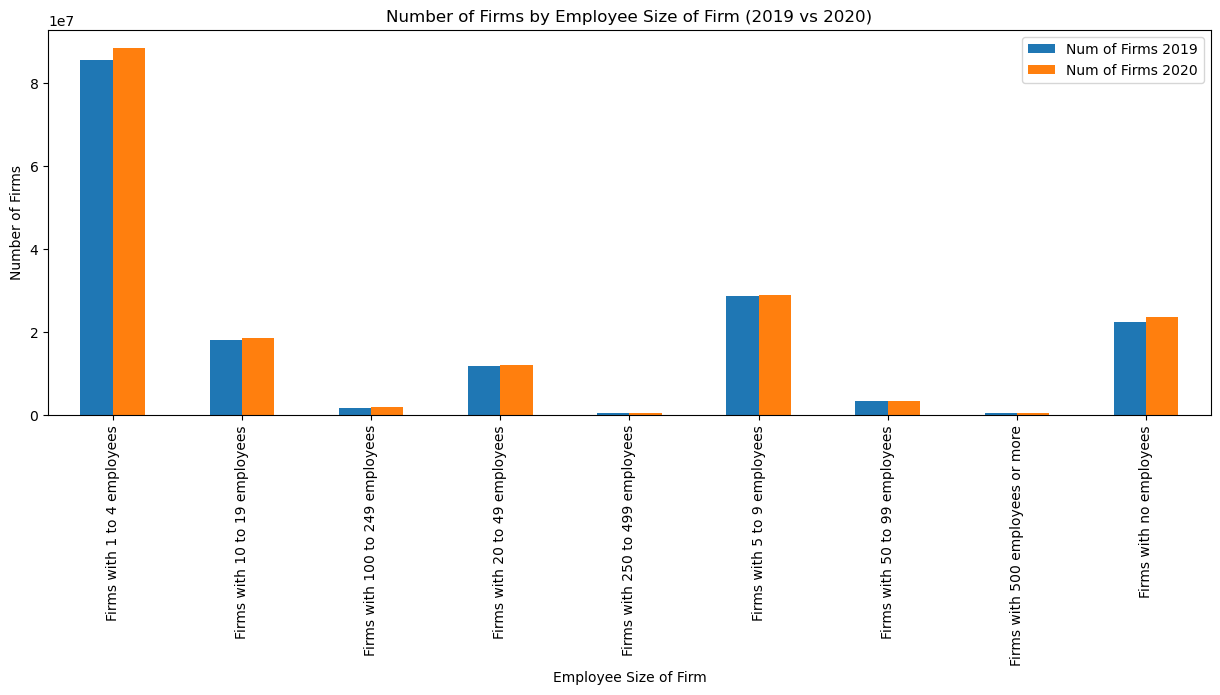

In [323]:

ax = analysis_df1.plot(x="EMPSZFI_LABEL", y=['Num of Firms 2019', 'Num of Firms 2020'], kind="bar", rot=90, figsize=(15, 5))
ax.set_title("Number of Firms by Employee Size of Firm (2019 vs 2020)")
ax.set_xlabel("Employee Size of Firm")
ax.set_ylabel("Number of Firms");

In [324]:
mergedYearTables['RCPPDEMP2019'] = (
    pd.to_numeric(mergedYearTables['RCPPDEMP2019'],
                  errors='coerce')
      .fillna(0)
    )

mergedYearTables['RCPPDEMP2020'] = (
    pd.to_numeric(mergedYearTables['RCPPDEMP2020'],
                  errors='coerce')
      .fillna(0)
    )

analysis_df2 = (
    mergedYearTables
    .groupby(['EMPSZFI_LABEL'], as_index=False)
    .agg({'RCPPDEMP2019':'sum', 'RCPPDEMP2020':'sum'})
)

analysis_df2 = analysis_df2.rename({'RCPPDEMP2019': 'Revenue 2019', 'RCPPDEMP2020': 'Revenue 2020'}, axis=1)

analysis_df2

,EMPSZFI_LABEL,Revenue 2019,Revenue 2020
0,Firms with 1 to 4 employees,1.867006e+10,1.805159e+10
1,Firms with 10 to 19 employees,2.072570e+10,2.060797e+10
2,Firms with 100 to 249 employees,3.653792e+10,3.499270e+10
3,Firms with 20 to 49 employees,3.362192e+10,3.273281e+10
4,Firms with 250 to 499 employees,2.404931e+10,2.088242e+10
5,Firms with 5 to 9 employees,1.668449e+10,1.594085e+10
6,Firms with 50 to 99 employees,2.872882e+10,2.783585e+10
7,Firms with 500 employees or more,9.193916e+10,9.164703e+10
8,Firms with no employees,4.384442e+09,4.144637e+09


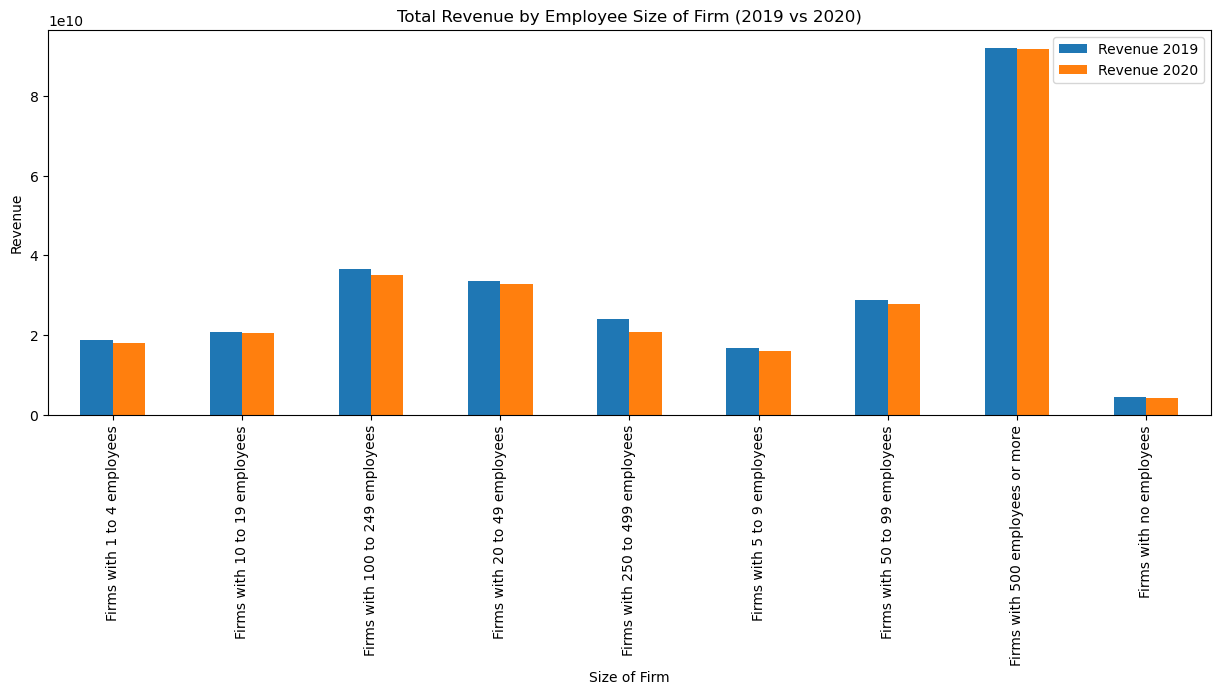

In [325]:
ax = analysis_df2.plot(x="EMPSZFI_LABEL", y=['Revenue 2019', 'Revenue 2020'], kind="bar", rot=90, figsize=(15, 5))
ax.set_title("Total Revenue by Employee Size of Firm (2019 vs 2020)")
ax.set_xlabel("Size of Firm")
ax.set_ylabel("Revenue");

In [326]:

mergedYearTables['EMP2019'] = (
    pd.to_numeric(mergedYearTables['EMP2019'],
                  errors='coerce')
      .fillna(0)
    )

mergedYearTables['EMP2020'] = (
    pd.to_numeric(mergedYearTables['EMP2020'],
                  errors='coerce')
      .fillna(0)
    )

analysis_df3 = (
    mergedYearTables
    .groupby(['EMPSZFI_LABEL'], as_index=False)
    .agg({'EMP2019':'sum', 'EMP2020':'sum'})
)

analysis_df3 = analysis_df3.rename({'EMP2019': 'Num of Employees 2019', 'EMP2020': 'Num of Employees 2020'}, axis=1)

analysis_df3

,EMPSZFI_LABEL,Num of Employees 2019,Num of Employees 2020
0,Firms with 1 to 4 employees,170161636.0,175090104.0
1,Firms with 10 to 19 employees,242468178.0,251366231.0
2,Firms with 100 to 249 employees,246198533.0,257858045.0
3,Firms with 20 to 49 employees,349419839.0,357008352.0
4,Firms with 250 to 499 employees,145969540.0,136807907.0
5,Firms with 5 to 9 employees,189557145.0,189689520.0
6,Firms with 50 to 99 employees,228747241.0,230693476.0
7,Firms with 500 employees or more,684586200.0,756211952.0
8,Firms with no employees,0.0,0.0


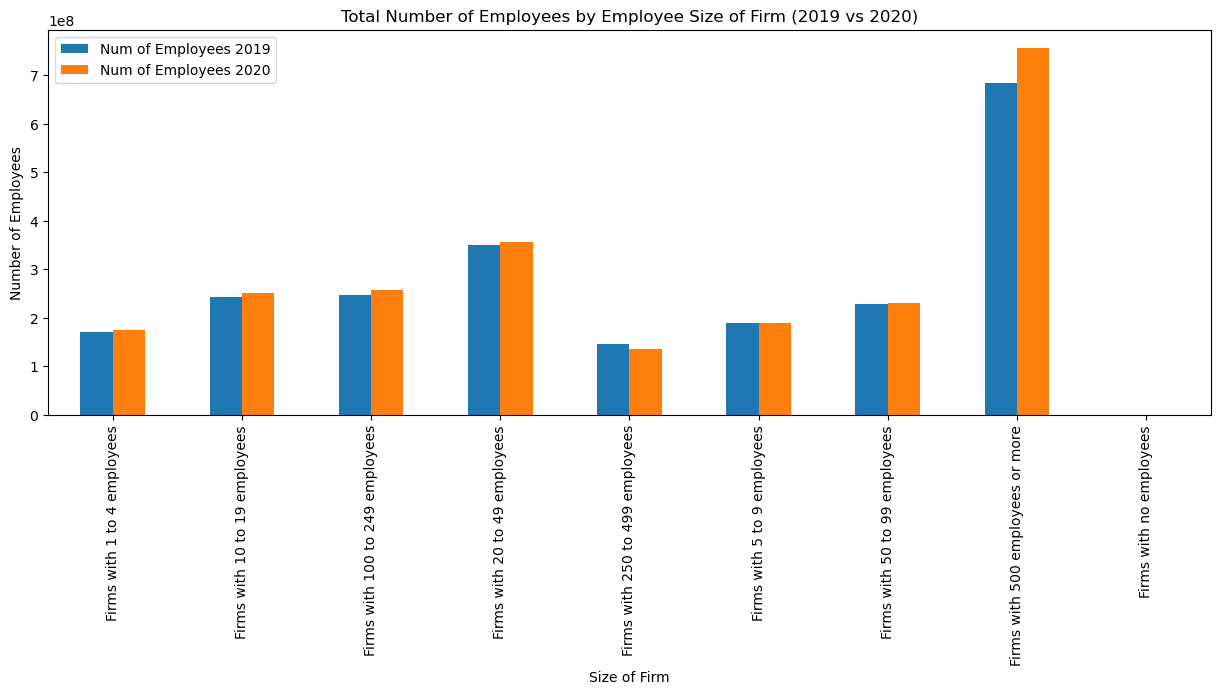

In [327]:

ax = analysis_df3.plot(x="EMPSZFI_LABEL", y=['Num of Employees 2019', 'Num of Employees 2020'], kind="bar", rot=90, figsize=(15, 5))
ax.set_title("Total Number of Employees by Employee Size of Firm (2019 vs 2020)")
ax.set_xlabel("Size of Firm")
ax.set_ylabel("Number of Employees");

In [328]:

mergedYearTables['PAYANN2019'] = (
    pd.to_numeric(mergedYearTables['PAYANN2019'],
                  errors='coerce')
      .fillna(0)
    )

mergedYearTables['PAYANN2020'] = (
    pd.to_numeric(mergedYearTables['PAYANN2020'],
                  errors='coerce')
      .fillna(0)
    )

analysis_df4 = (
    mergedYearTables
    .groupby(['EMPSZFI_LABEL'], as_index=False)
    .agg({'PAYANN2019':'sum', 'PAYANN2020':'sum'})
)

analysis_df4 = analysis_df4.rename({'PAYANN2019': 'Annual Payroll 2019', 'PAYANN2020': 'Annual Payroll 2020'}, axis=1)

analysis_df4

,EMPSZFI_LABEL,Annual Payroll 2019,Annual Payroll 2020
0,Firms with 1 to 4 employees,7.033139e+09,7.244299e+09
1,Firms with 10 to 19 employees,1.019773e+10,1.037097e+10
2,Firms with 100 to 249 employees,1.305671e+10,1.364040e+10
3,Firms with 20 to 49 employees,1.522761e+10,1.513777e+10
4,Firms with 250 to 499 employees,7.736558e+09,7.370597e+09
5,Firms with 5 to 9 employees,7.679364e+09,7.668968e+09
6,Firms with 50 to 99 employees,1.087016e+10,1.088767e+10
7,Firms with 500 employees or more,3.639365e+10,4.217832e+10
8,Firms with no employees,1.517067e+09,1.363620e+09


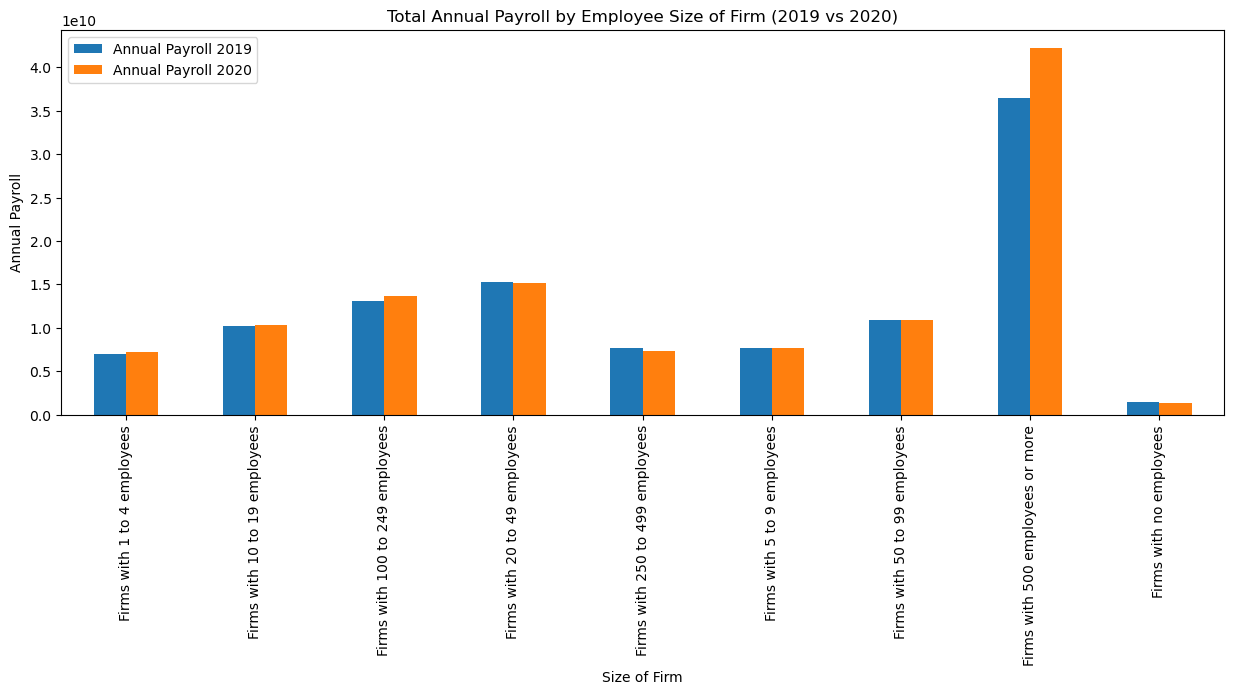

In [329]:
ax = analysis_df4.plot(x="EMPSZFI_LABEL", y=['Annual Payroll 2019', 'Annual Payroll 2020'], kind="bar", rot=90, figsize=(15, 5))
ax.set_title("Total Annual Payroll by Employee Size of Firm (2019 vs 2020)")
ax.set_xlabel("Size of Firm")
ax.set_ylabel("Annual Payroll");